In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
%matplotlib inline

In [59]:
# read data
train = pd.read_csv('all/train.csv',parse_dates=[2])
test = pd.read_csv('all/test.csv',parse_dates=[3])
store = pd.read_csv('all/store.csv')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
from IPython.display import display
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [74]:
train.head(100)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,4,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,4,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,4,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,4,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,4,2015-07-31,4822,559,1,1,0,1,2015,7,31,31
5,6,4,2015-07-31,5651,589,1,1,0,1,2015,7,31,31
6,7,4,2015-07-31,15344,1414,1,1,0,1,2015,7,31,31
7,8,4,2015-07-31,8492,833,1,1,0,1,2015,7,31,31
8,9,4,2015-07-31,8565,687,1,1,0,1,2015,7,31,31
9,10,4,2015-07-31,7185,681,1,1,0,1,2015,7,31,31


In [63]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [64]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


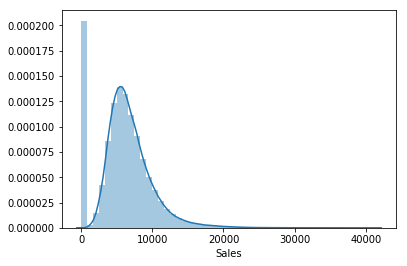

In [65]:
# target values
sns.distplot(train.Sales)

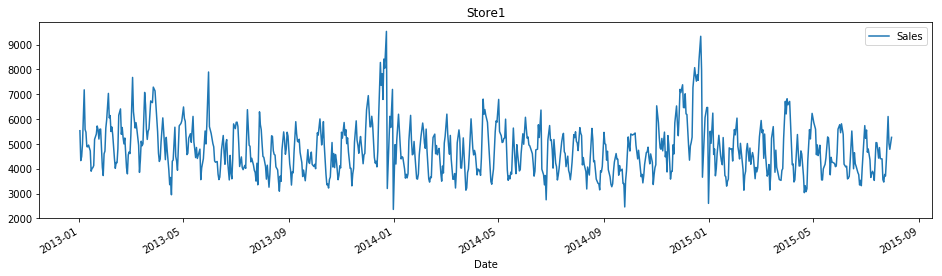

In [66]:
# Analyze changes in store sales over time
strain = train[train.Sales>0]
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(16,4))

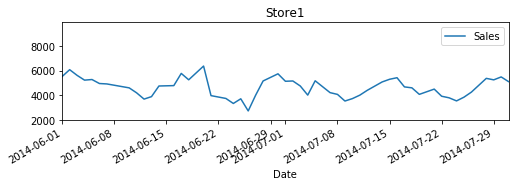

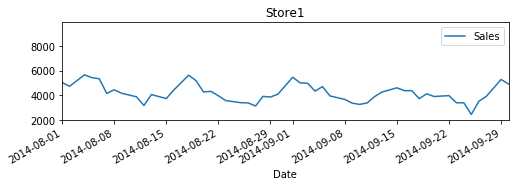

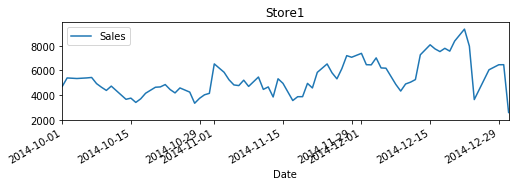

In [67]:
# we can see Sales increased significantly in November and December
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-6-1','2014-7-31'])
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-8-1','2014-9-30'])
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(8,2),xlim=['2014-10-1','2014-12-31'])

In [70]:
# add new time features
train['Year'] = train.Date.dt.year
train['Month'] = train.Date.dt.month
train['Day'] = train.Date.dt.day
train['DayOfWeek'] = train.Date.dt.dayofweek
train['WeekOfYear'] = train.Date.dt.weekofyear


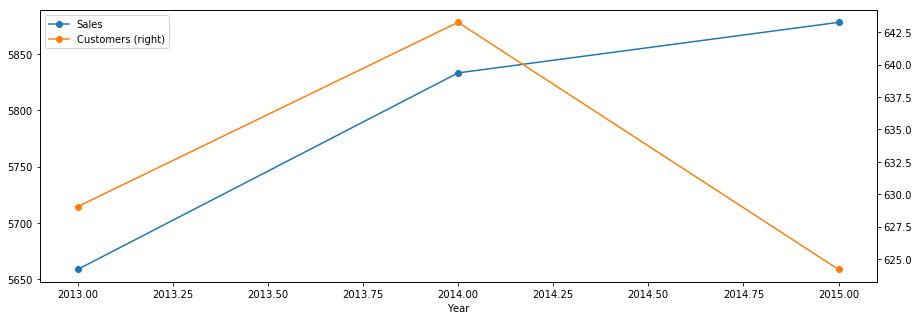

In [72]:
train.groupby('Year')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o')

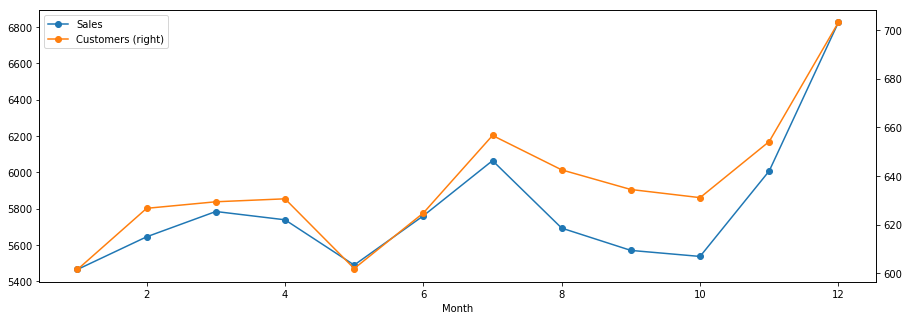

In [71]:
train.groupby('Month')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o')

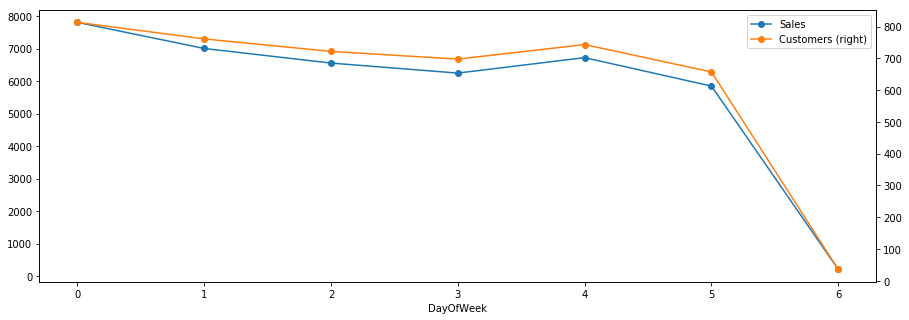

In [73]:
train.groupby('DayOfWeek')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o')

In [75]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,4,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,4,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,4,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,4,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,4,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
5575,1,6,2015-07-26,0,0,0,0,0,0,2015,7,26,30
5576,2,6,2015-07-26,0,0,0,0,0,0,2015,7,26,30
5577,3,6,2015-07-26,0,0,0,0,0,0,2015,7,26,30
5578,4,6,2015-07-26,0,0,0,0,0,0,2015,7,26,30
5579,5,6,2015-07-26,0,0,0,0,0,0,2015,7,26,30
5580,6,6,2015-07-26,0,0,0,0,0,0,2015,7,26,30
5581,7,6,2015-07-26,0,0,0,0,0,0,2015,7,26,30
5582,8,6,2015-07-26,0,0,0,0,0,0,2015,7,26,30
5583,9,6,2015-07-26,0,0,0,0,0,0,2015,7,26,30
5584,10,6,2015-07-26,0,0,0,0,0,1,2015,7,26,30
